# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 1 &mdash; часть A

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* Прислать нужно **ноутбук в формате ipynb**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

<font size="5">Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами <b>удалять и изменять нельзя</b>, в противном случае соответствующее задание не будет оценено.</font>

In [61]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import factorial, gammaln

### Задача 1.1

Пусть $X_1, ..., X_n$ &mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$.
Реализуйте функции, вычисляющие:
* логарифм правдоподобия;
* градиент логарифма правдоподобия;
* оценку $\theta$ по методу максимального правдоподобия.

_Замечание: функция вычисления логарифма факториала уже реализована ниже_

In [62]:
def logfactorial(x):
    return gammaln(x + 1)

In [63]:
def poiss_loglikelihood(x, theta):
    likelihood_log = 0
    for i in x:
        likelihood_log += i*np.log(theta)-logfactorial(i)
    likelihood_log -= len(x)*theta
    return likelihood_log

In [64]:
x = np.array([1, 2, 3])
assert round(poiss_loglikelihood(x, 1.9), 2) == -4.33
assert poiss_loglikelihood(x, 1.9) > poiss_loglikelihood(x, 4.2)

In [65]:
def poiss_loglikelihood_grad(x, theta):
    likelihood_log_grad = np.sum(x)/theta - len(x)
    return likelihood_log_grad

In [66]:
x = np.array([1, 2, 3])
assert round(poiss_loglikelihood_grad(x, 1.9), 2) == 0.16

In [67]:
def poiss_maxlikelihood_estimator(x):
    maxlikelihood_estimate = np.average(x)
    return maxlikelihood_estimate

In [68]:
x = np.array([1, 2, 3])
theta = poiss_maxlikelihood_estimator(x)
assert np.allclose(poiss_loglikelihood_grad(x, theta), 0)
assert np.allclose(poiss_maxlikelihood_estimator(x), 2)

### Задача 1.2

Дана выборка $X_1, ..., X_n$ из нормального распределения $\mathcal{N}(a, \sigma^2)$. Реализуйте функции, вычисляющие:
* логарифм правдоподобия для параметра $\theta = (a, \sigma)$;
* градиент логарифма правдоподобия $\theta$;
* оценку $\theta$ по методу максимального правдоподобия.

In [69]:
def norm_loglikelihood(x, a, sigma):
    n = len(x)
    likelihood_log = -n*(np.log(2*np.pi)/2+np.log(sigma))-np.sum((x-a)**2)/(2*sigma**2)
    return likelihood_log

In [70]:
x = np.array([1, 2, 3])
assert round(norm_loglikelihood(x, 0, 1), 2) == -9.76
assert norm_loglikelihood(x, 0, 1) < norm_loglikelihood(x, 1, 1)
assert norm_loglikelihood(x, 0, 1) > norm_loglikelihood(x, 0, 100)

In [71]:
def norm_loglikelihood_grad(x, a, sigma):
    likelihood_log_grad = np.array([np.sum(x-a)/(sigma**2), np.sum((x-a)**2)/(sigma**3) - len(x)/sigma])
    return likelihood_log_grad


In [72]:
x = np.array([1, 2, 3])
assert np.allclose(norm_loglikelihood_grad(x, 1.9, 3), [0.03, -0.92], atol=0.01)

In [73]:
def norm_maxlikelihood_estimator(x):
    maxlikelihood_estimate = np.array([np.average(x), np.sqrt(np.sum((x-np.average(x))**2)/len(x))])
    return maxlikelihood_estimate

In [74]:
x = np.array([1, 2, 3])
a, sigma = norm_maxlikelihood_estimator(x)
assert np.allclose(norm_loglikelihood_grad(x, a, sigma), 0)
assert np.allclose([a, sigma], [2.00, 0.82], atol=0.01)

---

__________________
### Задача 2.1
Даны 6 параметрических моделей &mdash; для каждой нужно реализовать подсчёт функции правдоподобия по небольшой выборке, чтобы затем построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$.

*b).* Параметрическая модель $Exp(\theta)$.

*c).* Параметрическая модель $U[0, \theta]$.

*d).* Параметрическая модель $Bin(5, \theta)$.

*e).* Параметрическая модель $Pois(\theta)$.

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига.

In [75]:
def calc_likelihood(dist_name, theta_grid, sample):
    theta_grid = theta_grid.reshape((-1, 1))
    sample = sample.reshape((1, -1))

    if dist_name == "normal":
        return sps.norm(loc=theta_grid).pdf(sample).prod(axis=1)
    
    elif dist_name == "expon":
        return sps.expon(scale=theta_grid).pdf(sample).prod(axis=1)
    
    elif dist_name == "uniform":

        return sps.uniform(scale=theta_grid).pdf(sample).prod(axis=1)
    
    elif dist_name == "binomial":
        return sps.binom.pmf(sample, 5, theta_grid).prod(axis=1)
    
    elif dist_name == "poisson":
        return sps.poisson.pmf(sample, theta_grid).prod(axis=1)
    
    elif dist_name == "cauchy":
        return sps.cauchy(loc=theta_grid).pdf(sample).prod(axis=1)

    assert False

In [76]:
check_values = {
 'normal': {'sample': [-1, 1], 'theta': [1.0, 2.0], 'likelihood': [0.0215, 0.0011]},
 'expon': {'sample': [1, 2], 'theta': [6.0, 7.0], 'likelihood': [0.0168, 0.0133]},
 'uniform': {'sample': [0.2, 0.8], 'theta': [1.8, 2.1], 'likelihood': [0.3086, 0.2268]},
 'binomial': {'sample': [5, 5], 'theta': [0.6, 0.7], 'likelihood': [0.006, 0.0282]},
 'poisson': {'sample': [5, 10], 'theta': [6.04, 7.03], 'likelihood': [0.0068, 0.0091]},
 'cauchy': {'sample': [-0.5, 0.5], 'theta': [1.0, 2.0], 'likelihood': [0.0249, 0.0043]}
}
for dist_name, params in check_values.items():
    ans = calc_likelihood(dist_name, np.array(params["theta"]), np.array(params["sample"]))
    ref = np.array(params["likelihood"])
    assert ans.shape == ref.shape
    assert np.allclose(ans, ref, atol=1e-4)

Посмотрим на графики функций правдоподобия:

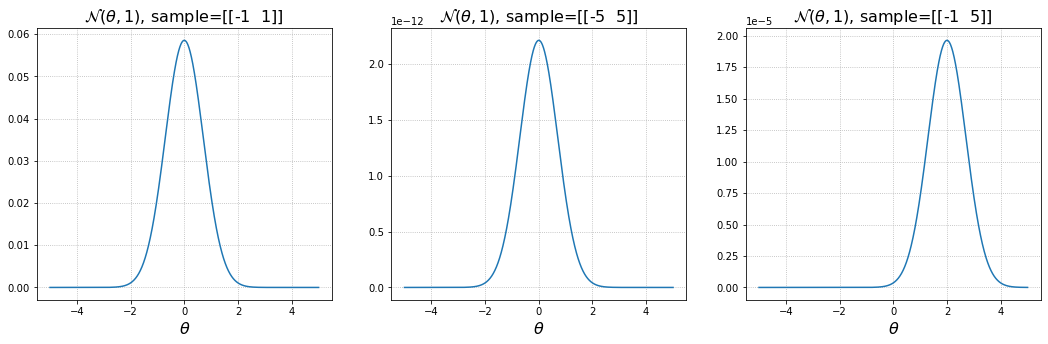

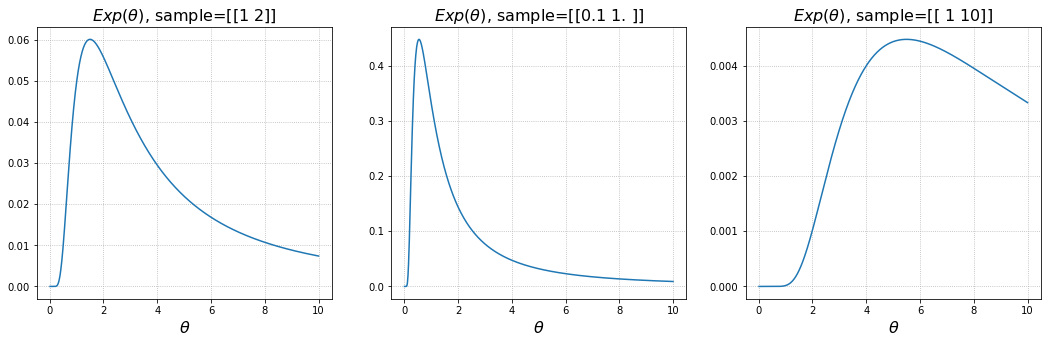

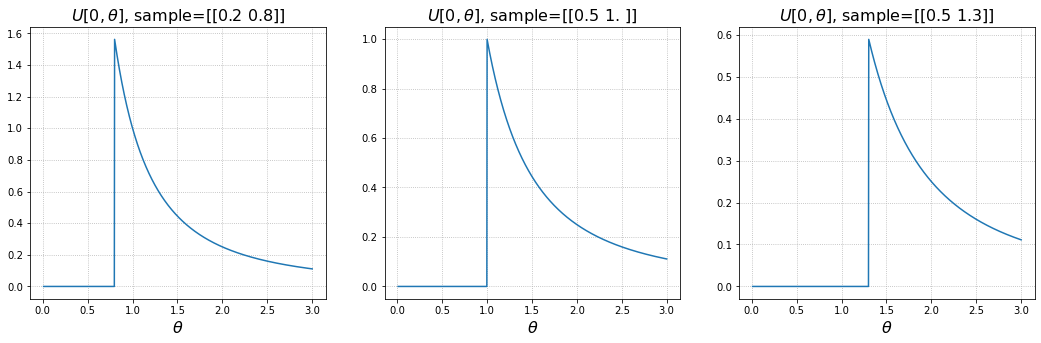

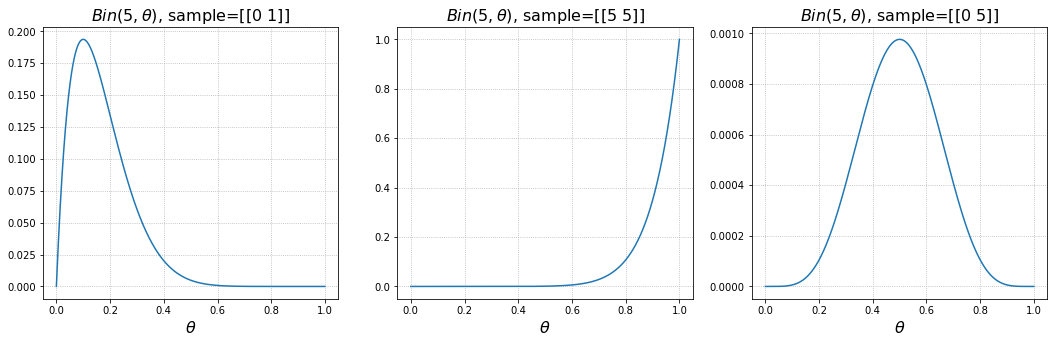

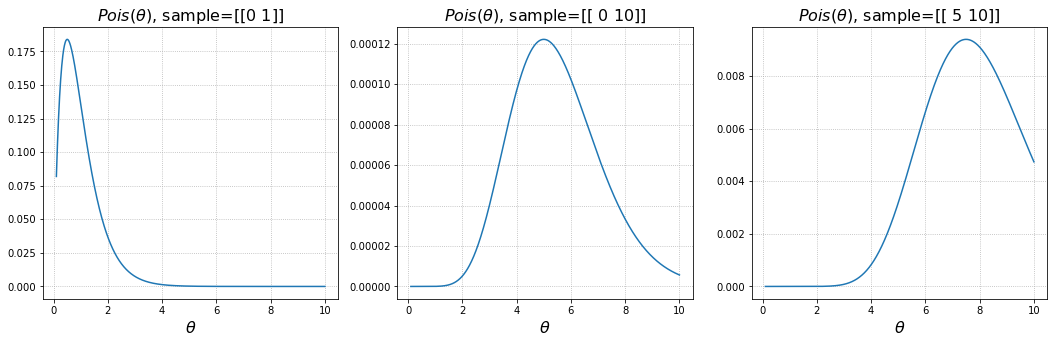

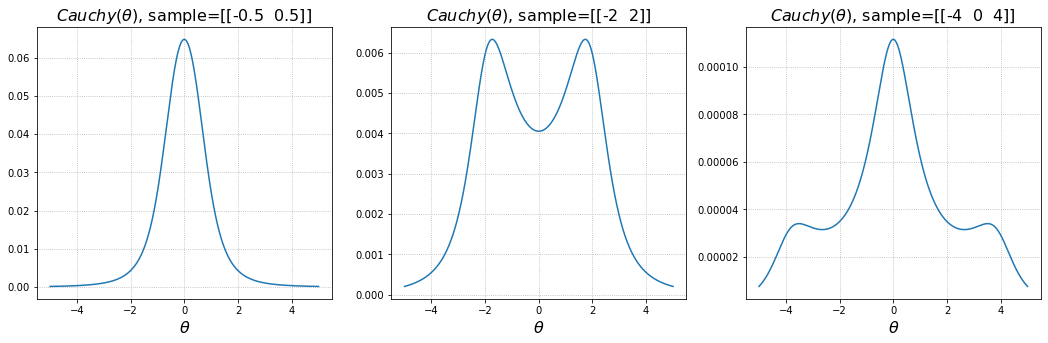

In [77]:
dist2samples = {
    "normal":   [[-1, 1], [-5, 5], [-1, 5]],
    "expon":    [[1, 2], [0.1, 1], [1, 10]],
    "uniform":  [[0.2, 0.8], [0.5, 1], [0.5, 1.3]],
    "binomial": [[0, 1], [5, 5], [0, 5]],
    "poisson":  [[0, 1], [0, 10], [5, 10]],
    "cauchy":   [[-0.5, 0.5], [-2, 2], [-4, 0, 4]],
}
dist2grid = {
    "normal":   np.linspace(-5, 5, 1000),
    "expon":    np.linspace(0.01, 10, 1000),
    "uniform":  np.linspace(0.01, 3, 1000),
    "binomial": np.linspace(0, 1, 1000),
    "poisson":  np.linspace(0.1, 10, 1000),
    "cauchy":   np.linspace(-5, 5, 1000),
}
dist2label = {
    "normal":   r"$\mathcal{N}(\theta, 1)$",
    "expon":    r"$Exp(\theta)$",
    "uniform":  r"$U[0, \theta]$",
    "binomial": r"$Bin(5, \theta)$",
    "poisson":  r"$Pois(\theta)$",
    "cauchy":   r"$Сauchy(\theta)$",
}

for dist_name in dist2samples.keys():
    label = dist2label[dist_name]

    plt.figure(figsize=(18, 5))
    grid = dist2grid[dist_name]
    for i, sample in enumerate(dist2samples[dist_name]):
        sample = np.array(sample).reshape((1, -1))
        likelihood = calc_likelihood(dist_name, grid, sample)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки.

**Вывод:**

*a).* $\mathcal{N}(\theta, 1)$: для выборок, симметричных относительно 0, отличаются только значением максимума, для остальных выборок будет сдвиг пика по оси $\theta$ и также будут отличатся значения максимумов.

*b).* $Exp(\theta)$: при увеличении разницы между элементами выборки график становится шире.

*c).* $U[0, \theta]$: при увеличении разницы между элементами выборки график становится шире.

*d).* $Bin(5, \theta)$: при увеличении разницы между элементами выборки график становится шире.

*e).* $Pois(\theta)$: при увеличении разницы между элементами выборки график становится шире.

*f).* $Сauchy(\theta)$: функция всегда имеет экстремум в точке $\theta = 0$. Значение функции в точке $\theta = 0$ увеличисвается, когда увеличивается расстояние между самыми удаленными элементами выборки.

Является ли функция правдоподобия плотностью? Имеет ли она единственный максимум? Дайте ответы на эти вопросы в переменных следующей ячейке, записав в соответствующую переменную либо название распределения, для которого это свойство не выполняется, либо `None`, если свойство верно всегда.

$\textbf{Ответ:}$

Функция правдободобия является плотностью вероятности совместного появления всех элементов выборки.

In [106]:
non_density = None
non_single_maximum = 'cauchy'

In [79]:
assert non_density in [None, 'normal', 'expon', 'uniform', 'binomial', 'poisson', 'cauchy']
assert non_single_maximum in [None, 'normal', 'expon', 'uniform', 'binomial', 'poisson', 'cauchy']
# А тут скрытые assert'ы :)

### Задача 2.2

Дана функция, которая по выборке $(X_1, \ldots, X_n)$ и двум числам $\mu_0, \mu_1$ определяет, какое из двух распределений &mdash; $\mathcal{N}(\mu_0, 1)$ или $\mathcal{N}(\mu_1, 1)$ &mdash; более точно описывает выборку, путём сравнения функций правдоподобия:

In [80]:
def select(x, u0, u1):
    prob0 = sps.norm(loc=u0).pdf(x).prod()
    prob1 = sps.norm(loc=u1).pdf(x).prod()
    if prob0 > prob1:
        return 0
    else:
        return 1

Пример работы для выборки размера 30 из $\mathcal{N}(0.1, 1)$:

In [81]:
np.random.seed(1)

In [82]:
select(sps.norm(loc=0.1).rvs(30), u0=0, u1=1)

0

In [83]:
select(sps.norm(loc=0.1).rvs(30), u0=1, u1=0)

1

Однако она некорректно работает для выборок большого размера:

In [84]:
select(sps.norm(loc=0.1).rvs(1000), u0=0, u1=1) # returns 1

1

In [85]:
select(sps.norm(loc=0.1).rvs(1000), u0=1, u1=0) # returns 0

1

Почему такое происходит?

**Ответ:**

Это происходит из-за большого размера выборок: большая часть точек располагается вне "купола" нормального распределения, поэтому значения вероятности в них очень маленькие. При перемножении итоговое значение функции правдоподобия будет меньше машинного нуля.

Напишите исправленную версию функции, которая также выбирает подходящий параметр на основе значения правдободобия, но работает и для выборок большого размера.

_Подсказка: обратите внимание на значения функций правдоподобия при маленькой и большой выборке. Нужно использовать некоторый метод класса `sps.norm`._

In [86]:
def select_fixed(x, u0, u1):
    prob0 = sps.norm(loc=u0).logpdf(x).sum()
    prob1 = sps.norm(loc=u1).logpdf(x).sum()
    if prob0 > prob1:
        return 0
    else:
        return 1

In [87]:
x = sps.norm(loc=0.1).rvs(1000)
assert select_fixed(x, u0=0, u1=1) == 0
assert select_fixed(x, u0=1, u1=0) == 1

### Задача 3
В этой задаче нужно визуально проверить *свойство состоятельности*.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U(0, \theta)$.

Рассмотрим 5 оценок $\theta$:
- $\widehat{\theta}_a = 2\overline{X}$
- $\widehat{\theta}_b = \max_i X_i$
- $\widehat{\theta}_c = 2\sqrt{\overline{X^2}}$
- $\widehat{\theta}_d = \sqrt{3\overline{X^2}}$
- $\widehat{\theta}_e = (n - 1) \min_i X_i$

Дано множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leqslant j \leqslant 300$.
<br>
По каждой из них посчитайте оценки
$\widehat{\theta}_{a,jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$,
$\widehat{\theta}_{b,jn} = \max(X^j_1, \dots, X^j_n)$,
$\widehat{\theta}_{c,jn} = 2 \cdot \sqrt{\frac{\sum_{i=1}^n {X_{ji}^2}}{n}}$ и т.д.,
для $1 \leqslant n \leqslant 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)`.

In [88]:
x = sps.uniform().rvs((300, 500))

estimations = [
    2 * x.cumsum(axis = 1) / np.linspace(1, 500, num = 500), # theta_a
    np.maximum.accumulate(x, axis = 1), # theta_b
    2 * ((x**2).cumsum(axis = 1) / np.linspace(1, 500, num = 500))**0.5, # theta_c
    (3 * (x**2).cumsum(axis = 1) / np.linspace(1, 500, num = 500))**0.5, # theta_d
    np.linspace(2, 501, num = 500) * np.minimum.accumulate(x, axis=1), # theta_e
]
 # В условии судя по всему опечатка: имеется в виду n + 1 для theta_e

In [89]:
assert np.allclose(estimations[0][42, 1], 2 * (x[42, 0] + x[42, 1]) / 2)
assert np.allclose(estimations[1][42, 1], max(x[42, 0], x[42, 1]))
assert np.allclose(estimations[2][42, 1], 2 * ((x[42, 0]**2 + x[42, 1]**2) / 2)**0.5)
assert np.allclose(estimations[3][42, 1], (3 * (x[42, 0]**2 + x[42, 1]**2) / 2)**0.5)
assert np.allclose(estimations[4][42, 1], 3 * min(x[42, 0], x[42, 1]))
assert len(estimations) == 5
assert all(estimations[i].shape == (300, 500) for i in range(5))

Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

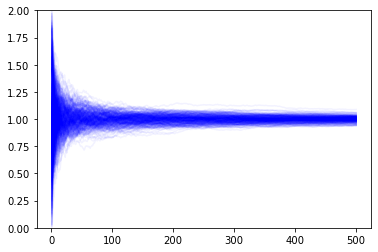

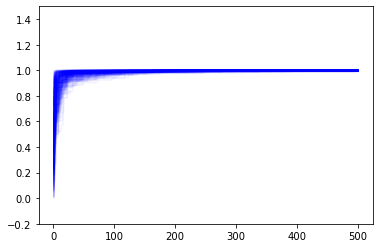

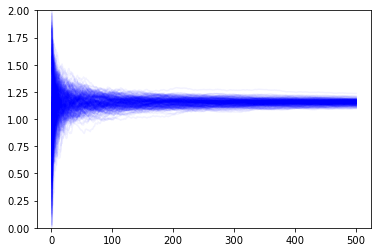

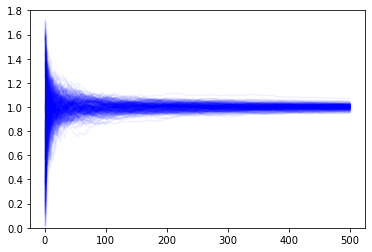

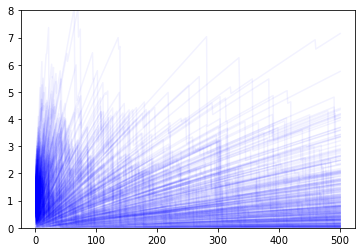

In [90]:
n = np.linspace(1, 500, num = 500)
ylim = [[0, 2], [-0.2, 1.5], [0, 2], [0, 1.8], [0, 8]]

for i in range(5):
    plt.figure()
    plt.ylim(ylim[i])
    for k in range(300):
        plt.plot(n, estimations[i][k], alpha = 0.05, color = 'b')
plt.show()


Укажите, для каких оценок, судя по графику, наблюдается свойство состоятельности:

In [91]:
consistent_estimators = {'a', 'b', 'd'}

In [92]:
assert isinstance(consistent_estimators, set)
assert consistent_estimators <= {"a", "b", "c", "d", "e"}
# А тут скрытые assert'ы :)